In [2]:
!pip install fastai

    100% |████████████████████████████████| 153kB 8.7MB/s ta 0:00:01
    100% |████████████████████████████████| 23.3MB 1.8MB/s eta 0:00:01
    100% |████████████████████████████████| 1.9MB 18.6MB/s ta 0:00:01
    100% |████████████████████████████████| 614kB 20.5MB/s ta 0:00:01
    100% |████████████████████████████████| 194kB 22.2MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 30.4MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 28.7MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 27.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for nvidia-ml-py3 ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7


  Running setup.py bdist_wheel for regex ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/74/17/3f/c77bba99efd74ba1a19862c9dd97f4b6d735e2826721dc00ff
  Running setup.py bdist_wheel for ujson ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
  Running setup.py bdist_wheel for dill ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/e2/5d/17/f87cb7751896ac629b435a8696f83ee75b11029f5d6f6bda72
Successfully built nvidia-ml-py3 regex ujson dill
spacy 2.0.16 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.imports import *
from fastai.layers import *

In [8]:
PATH = Path('data/horse2zebra/')

In [4]:
# from IPython.display import Image
# from IPython.display import display
# x = Image(filename=str(img.ls()[1].resolve())) 
# y = Image(filename=str(img.ls()[2].resolve()))
# # y = Image(filename=img[2:3]) 
# display(x, y)



In [22]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showImagesMatrix(list_of_files, col=5, mypath='.'):
    fig = figure(figsize=(15, 7))
    row = len(list_of_files) / col
    if (len(list_of_files) % col != 0):
        row += 1
    for i in range(len(list_of_files)):
        a=fig.add_subplot(row, col, i + 1)
        image = imread(mypath + '/' + list_of_files[i])
        imshow(image)
        axis('off')

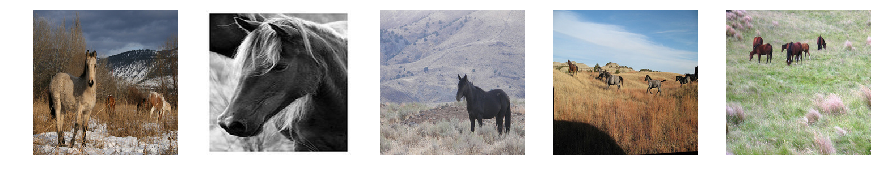

In [25]:
a = PATH/'trainA'
num_images = 5
list_of_image_paths = [str(x) for x in list(a.ls())[:num_images]]
list_of_image_paths

showImagesMatrix(list_of_image_paths, col=5)

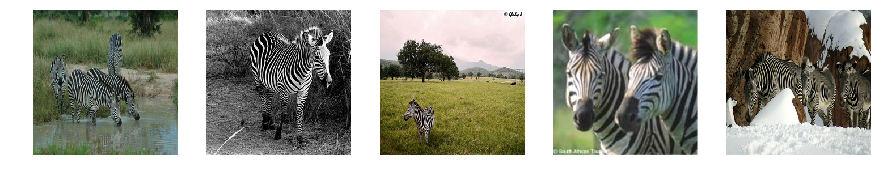

In [26]:
a = PATH/'trainB'
num_images = 5
list_of_image_paths = [str(x) for x in list(a.ls())[:num_images]]
list_of_image_paths

showImagesMatrix(list_of_image_paths, col=5)

In [27]:
## define first conv seq layer
def conv_layer(ni, nf, kernal_size=3, stride=1):
    return nn.Sequential(
        nn.Conv2d(ni, nf, kernel_size=kernal_size, stride=stride, bias=False,
                paddings=kernal_size//2),
        nn.BatchNorm2d(nf, momentum=0.01),
        nn.LeakyReLU(negative_slope=0.1, inplace=True)
    )

In [ ]:
## from https://docs.fast.ai/vision.transform.html to print images after transform
def get_ex(): return open_image('imgs/cat_example.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

In [4]:
from fastai.vision import *

In [11]:
dataA = ImageDataBunch.from_folder(PATH, train='trainA', valid='testA')
dataB = ImageDataBunch.from_folder(PATH, train='trainB', valid='testB')

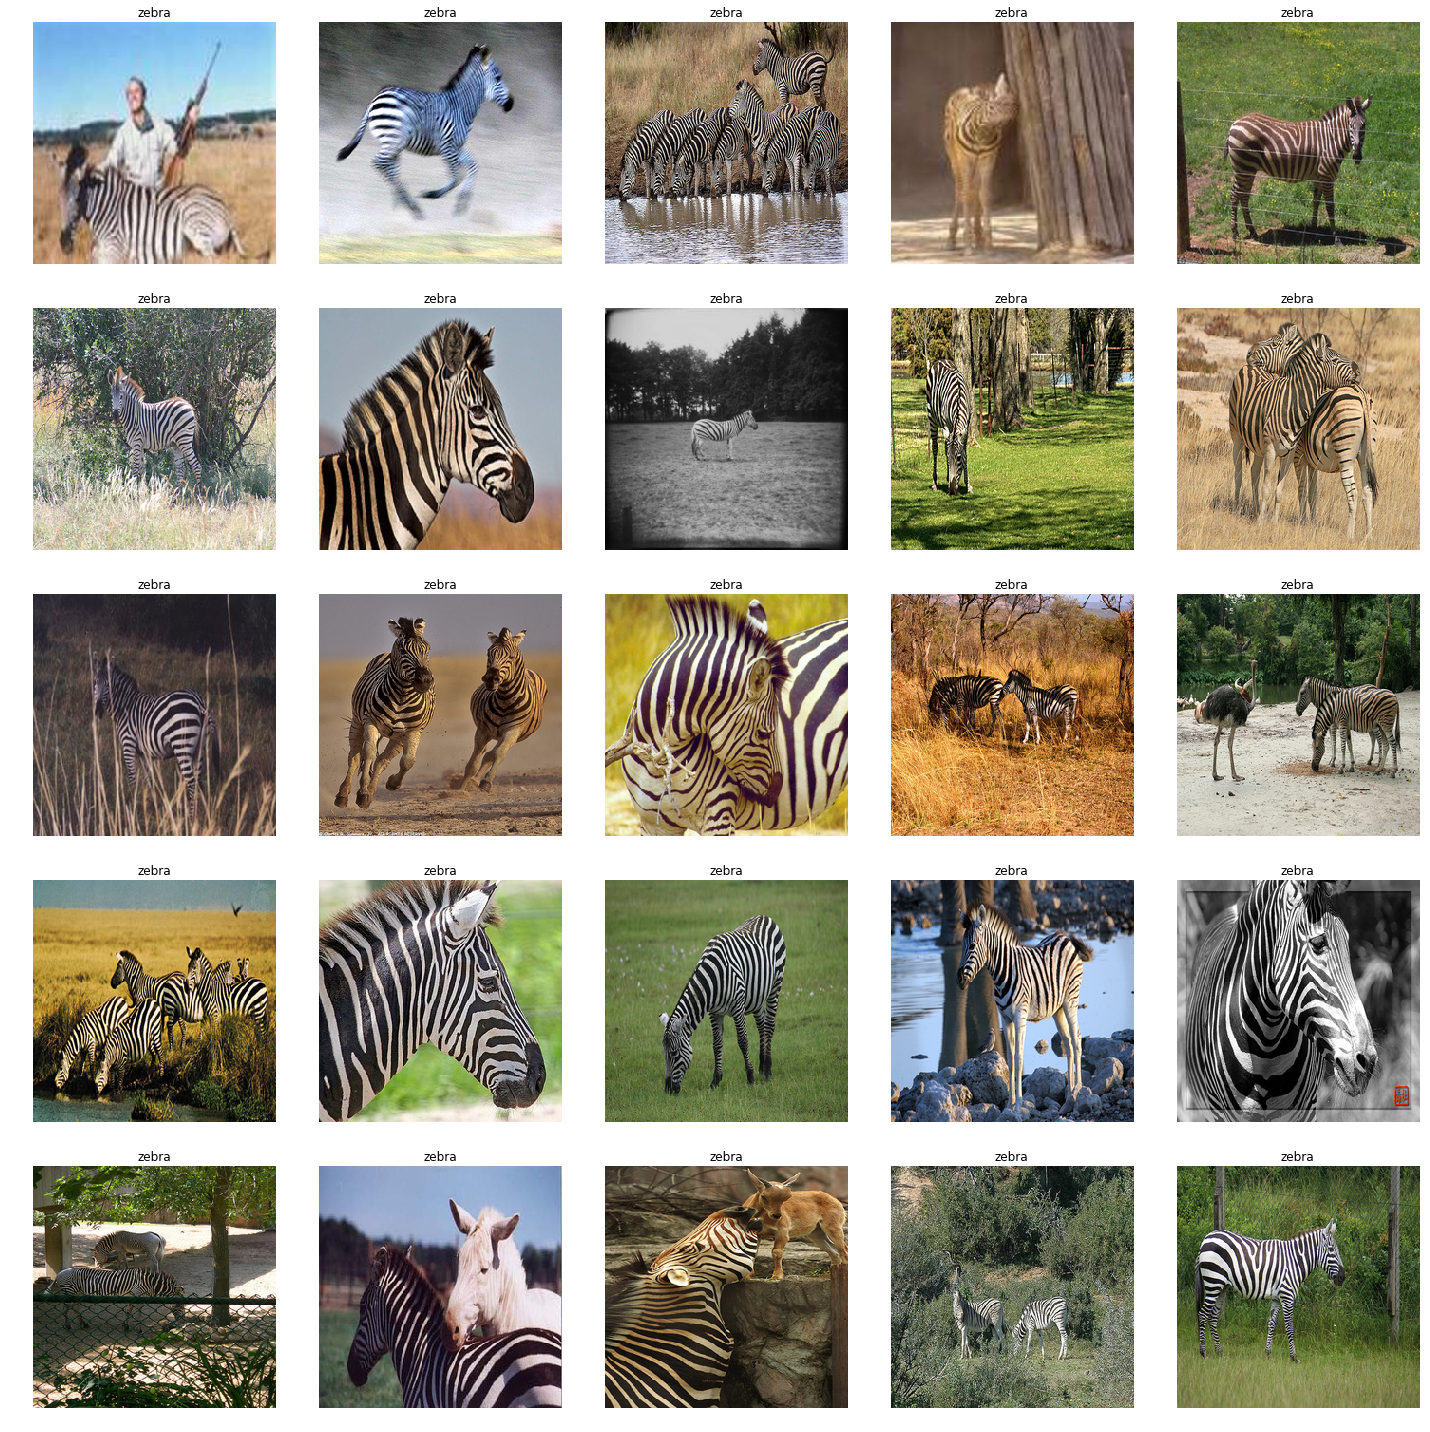

In [14]:
dataB.show_batch(row=3)